 # ASSIGNMENT_2

## EDA and Preprocessing

### ---------------------------------------------------------

In [45]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting charts and graphs
import seaborn as sns  # For statistical data visualization
import scipy.stats as stats  # For statistical analysis
import plotly.express as px  # For interactive visualizations
#import pandas_profiling  # For quick and detailed data profiling
#import sweetviz as sv  # For visualizing and comparing data
# import dtale  # For interactive visualizations of dataframes
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling



## .Data Exploration: (Score : 2)
### .Explore the data, list down the unique values in each feature and find its length.
### .Perform the statistical analysis and renaming of the columns.


In [47]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
data = pd.read_csv(url)

# Explore unique values and their lengths
unique_values = {col: data[col].unique() for col in data.columns}
lengths = {col: len(data[col].unique()) for col in data.columns}

print("Unique Values and their Lengths:")
for col in data.columns:
    print(f"{col}: {lengths[col]} unique values")

# Perform statistical analysis
stats = data.describe()

# Renaming columns (if needed)
# Example: data.rename(columns={'old_name': 'new_name'}, inplace=True)
# data.columns = [col_name.lower() for col_name in data.columns]  # Convert column names to lowercase

print("\nStatistical Analysis:")
print(stats)

# print("\nRenamed Columns:")
print(data.columns)


Unique Values and their Lengths:
Company: 7 unique values
Age: 30 unique values
Salary: 41 unique values
Place: 12 unique values
Country: 1 unique values
Gender: 2 unique values

Statistical Analysis:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000
Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [13]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### ------------------------------------------------------------------------------------------------------

## .Data Cleaning: (Score : 2)
### .Find the missing and inappropriate values, treat them appropriately.
### .Remove all duplicate rows.
### .Find the outliers.
### .Replace the value 0 in age as NaN
### .Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


In [3]:
# Step 1: Find and Treat Missing and Inappropriate Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [5]:
# Step 2: Remove Duplicate Rows
data = data.drop_duplicates()
print(f"Rows after removing duplicates: {len(data)}")

Rows after removing duplicates: 144


In [76]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
data = pd.read_csv(url)

# Step 1: Find and Treat Missing and Inappropriate Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Step 2: Remove Duplicate Rows
data = data.drop_duplicates()
print(f"Rows after removing duplicates: {len(data)}")

# Step 3: Find and Handle Outliers (Using Z-Score method as an example)
numeric_features = data.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(data[numeric_features]))
outliers = (z_scores > 3).any(axis=1)
data = data[~outliers]
print(f"Rows after removing outliers: {len(data)}")

# Step 4: Replace Value 0 in Age with NaN using Method 2
data['Age'] = data['Age'].replace(0, np.nan)

# Step 5: Treat Null Values (Replacing age with mode and salary with median)
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

# Display the cleaned data
print("\nCleaned Data:")
print(data.head(25))


Missing Values:
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64
Rows after removing duplicates: 144
Rows after removing outliers: 144

Cleaned Data:
    Company   Age  Salary       Place Country  Gender
0       TCS  20.0  5000.0     Chennai   India       0
1   Infosys  30.0  5000.0      Mumbai   India       0
2       TCS  35.0  2300.0    Calcutta   India       0
3   Infosys  40.0  3000.0       Delhi   India       0
4       TCS  23.0  4000.0      Mumbai   India       0
5   Infosys  22.0  5000.0    Calcutta   India       0
6       TCS  22.0  6000.0     Chennai   India       1
7   Infosys  23.0  7000.0      Mumbai   India       1
8       TCS  34.0  8000.0    Calcutta   India       1
9       CTS  45.0  9000.0       Delhi   India       0
10      CTS  23.0  5000.0      Mumbai   India       0
11      CTS  34.0  1089.0    Calcutta   India       0
12      CTS  45.0  5000.0     Chennai   India       0
13      CTS  18.0  1234.0      Mumbai   India 

In [78]:
# Step 3: Find and Handle Outliers (Using Z-Score method as an example)
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
data = data[~outliers]
print(f"Rows after removing outliers: {len(data)}")

# Step 4: Replace Value 0 in Age with NaN using Method 2
data['Age'] = data['Age'].replace(0, np.nan)

# Step 5: Treat Null Values (Using Mean/Median/Mode as an example)
# Example: Replace with mean
data = data.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col.fillna(col.mean()))

# Display the cleaned data
print("\nCleaned Data:")
print(data.head(25))

Rows after removing outliers: 144

Cleaned Data:
    Company   Age  Salary       Place Country  Gender
0       TCS  20.0  5000.0     Chennai   India       0
1   Infosys  30.0  5000.0      Mumbai   India       0
2       TCS  35.0  2300.0    Calcutta   India       0
3   Infosys  40.0  3000.0       Delhi   India       0
4       TCS  23.0  4000.0      Mumbai   India       0
5   Infosys  22.0  5000.0    Calcutta   India       0
6       TCS  22.0  6000.0     Chennai   India       1
7   Infosys  23.0  7000.0      Mumbai   India       1
8       TCS  34.0  8000.0    Calcutta   India       1
9       CTS  45.0  9000.0       Delhi   India       0
10      CTS  23.0  5000.0      Mumbai   India       0
11      CTS  34.0  1089.0    Calcutta   India       0
12      CTS  45.0  5000.0     Chennai   India       0
13      CTS  18.0  1234.0      Mumbai   India       0
14  Infosys  40.0  3000.0    Calcutta   India       0
15      TCS  23.0  3000.0       Delhi   India       0
16  Infosys  23.0  3030.0  Podich

### ------------------------------------------------------------------------------------

## .Data Analysis: (Score : 2)
### .Filter the data with age >40 and salary<5000
### .Plot the chart with age and salary
### .Count the number of people from each place and represent it visually


Filtered Data:
    Company   Age  Salary      Place Country  Gender
21  Infosys  50.0  3184.0      Delhi   India       0
32  Infosys  45.0  4034.0   Calcutta   India       0
39  Infosys  41.0  3000.0     Mumbai   India       0
50  Infosys  41.0  3000.0    Chennai   India       0
57  Infosys  51.0  3184.0  Hyderabad   India       0


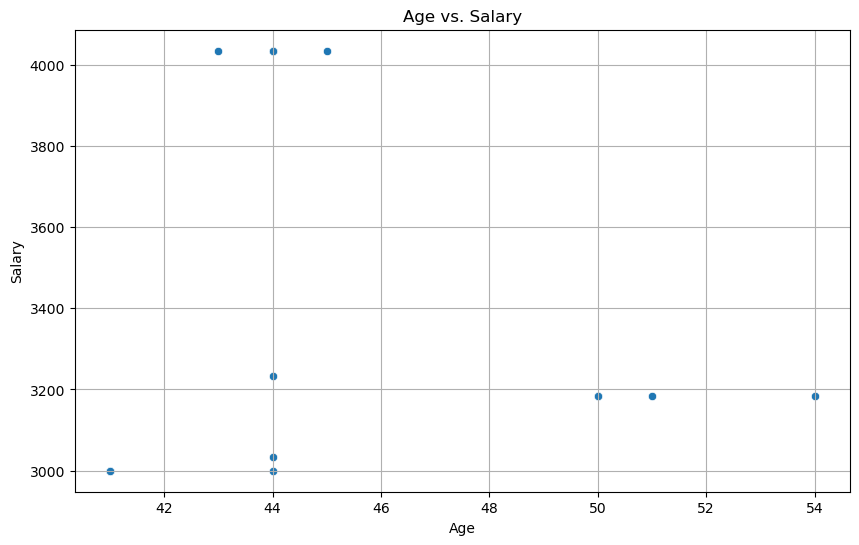

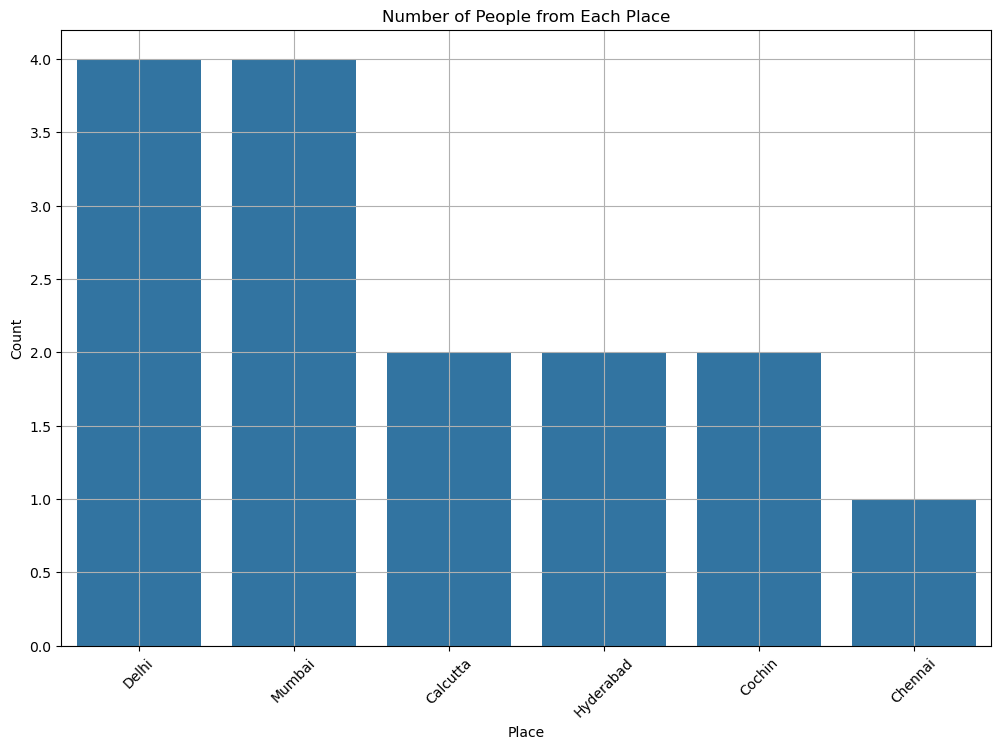

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
# data = pd.read_csv(url)

# Step 1: Filter the Data
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
print("Filtered Data:")
print(filtered_data.head())

# Step 2: Plot the Chart with Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=filtered_data)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Step 3: Count the Number of People from Each Place and Represent it Visually
place_counts = filtered_data['Place'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## --------------------------------------------------------------------------------

### .Data Encoding: (Score : 2)
### .Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


In [80]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
# url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
# data = pd.read_csv(url)

# Step 1: Identify Categorical Variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

# Step 2: Apply One-Hot Encoding
one_hot_encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print("One-Hot Encoded Data:")
print(one_hot_encoded_data.head())

# Step 3: Apply Label Encoding (Example on a specific column, e.g., 'gender')
label_encoder = LabelEncoder()
data['gender_encoded'] = label_encoder.fit_transform(data['Gender'])

print("Label Encoded Data:")
print(data[['Gender', 'gender_encoded']].head())


Categorical Columns:
Index(['Company', 'Place', 'Country'], dtype='object')
One-Hot Encoded Data:
    Age  Salary  Gender  Company_Congnizant  Company_Infosys  \
0  20.0  5000.0       0               False            False   
1  30.0  5000.0       0               False             True   
2  35.0  2300.0       0               False            False   
3  40.0  3000.0       0               False             True   
4  23.0  4000.0       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   Place_Calcutta  Place_Chennai  Place_Cochin  

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
data = pd.read_csv(url)

# Select only the numeric features for scaling
numeric_features = data.select_dtypes(include=[np.number]).columns
print("Numeric Features:")
print(numeric_features)

# Step 1: Standard Scaling
standard_scaler = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[numeric_features] = standard_scaler.fit_transform(data[numeric_features])

print("Standard Scaled Data:")
print(data_standard_scaled.head())

# Step 2: Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = data.copy()
data_min_max_scaled[numeric_features] = min_max_scaler.fit_transform(data[numeric_features])

print("Min-Max Scaled Data:")
print(data_min_max_scaled.head())


Numeric Features:
Index(['Age', 'Salary', 'Gender'], dtype='object')
Standard Scaled Data:
   Company       Age    Salary     Place Country    Gender
0      TCS -0.948501       NaN   Chennai   India -0.535683
1  Infosys -0.043841       NaN    Mumbai   India -0.535683
2      TCS  0.408489 -1.175200  Calcutta   India -0.535683
3  Infosys  0.860819 -0.902122     Delhi   India -0.535683
4      TCS -0.677103 -0.512010    Mumbai   India -0.535683
Min-Max Scaled Data:
   Company       Age    Salary     Place Country  Gender
0      TCS  0.370370       NaN   Chennai   India     0.0
1  Infosys  0.555556       NaN    Mumbai   India     0.0
2      TCS  0.648148  0.137817  Calcutta   India     0.0
3  Infosys  0.740741  0.217480     Delhi   India     0.0
4      TCS  0.425926  0.331285    Mumbai   India     0.0


In [ ]:
### ----------------------------------------------------------------------------------------------------------

### .Feature Scaling: (Score : 2)
### .After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
# url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
# data = pd.read_csv(url)

# Identify Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

# Drop Categorical Columns
data_dropped = data.drop(columns=categorical_columns)
print("Data after Dropping Categorical Columns:")
print(data_dropped.head())

# Select only the numeric features for scaling
numeric_features = data_dropped.select_dtypes(include=[np.number]).columns

# Standard Scaling
standard_scaler = StandardScaler()
data_standard_scaled = data_dropped.copy()
data_standard_scaled[numeric_features] = standard_scaler.fit_transform(data_dropped[numeric_features])

print("Standard Scaled Data:")
print(data_standard_scaled.head())

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = data_dropped.copy()
data_min_max_scaled[numeric_features] = min_max_scaler.fit_transform(data_dropped[numeric_features])

print("Min-Max Scaled Data:")
print(data_min_max_scaled.head())


Categorical Columns:
Index(['Company', 'Place', 'Country'], dtype='object')
Data after Dropping Categorical Columns:
    Age  Salary  Gender  gender_encoded
0  20.0  5000.0       0               0
1  30.0  5000.0       0               0
2  35.0  2300.0       0               0
3  40.0  3000.0       0               0
4  23.0  4000.0       0               0
Standard Scaled Data:
        Age    Salary    Gender  gender_encoded
0 -1.160646 -0.100827 -0.534522       -0.534522
1 -0.048650 -0.100827 -0.534522       -0.534522
2  0.507348 -1.243735 -0.534522       -0.534522
3  1.063346 -0.947426 -0.534522       -0.534522
4 -0.827047 -0.524127 -0.534522       -0.534522
Min-Max Scaled Data:
        Age    Salary  Gender  gender_encoded
0  0.081081  0.445089     0.0             0.0
1  0.351351  0.445089     0.0             0.0
2  0.486486  0.137817     0.0             0.0
3  0.621622  0.217480     0.0             0.0
4  0.162162  0.331285     0.0             0.0


# Conclusion
###We successfully implemented a data preprocessing system to address common challenges. Here’s a brief overview of the steps:

### .Data Exploration:

### Explored the dataset and performed statistical analysis.

### Renamed columns for clarity.

## Data Cleaning:

### Treated missing and inappropriate values, removed duplicates, and handled outliers.

### Replaced 0 in the 'age' column with NaN and treated null values with mode (for 'age') and median (for 'salary').

## Data Analysis:

### Filtered data for age > 40 and salary < 5000.

### Created a scatter plot for age and salary.

### Counted and visualized the number of people from each place.

## Data Encoding:

### Converted categorical variables into numerical representations using one-hot and label encoding.

## Feature Scaling:

### Scaled features using StandardScaler and MinMaxScaler.